### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
extract = False

In [6]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [7]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

# mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA7.nc')
# mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA7.nc')
# mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA7.nc')
# mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA7.nc')
# mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA7.nc')
# mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA7.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

# sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA7.nc')
# sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA7.nc')
# sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA7.nc')
# sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA7.nc')
# sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA7.nc')
# sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA7.nc')

## get trend - MLD

In [8]:
import pymannkendall as mk
from scipy import stats
def give_trends(ts_x,ts_y):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, mk_intercept = mk.original_test(ts_y)
    lin_slope, lin_intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p 

In [9]:
verbose = True
if extract:
    mld_ukesm_2A_50 = mld_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    mld_ukesm_2B_50 = mld_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    mld_OR_A = mld_ukesm_1A-mld_ukesm_2A
    mld_OR_B = mld_ukesm_1B-mld_ukesm_2B
    var = 'somxl010'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    sigar[:] = 1

    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [mld_OR_A, mld_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                       

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend--{lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [mld_ukesm_2A, mld_ukesm_2B]
    tdsBASEar = [mld_ukesm_2A_50, mld_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0    

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0         

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend--{lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/mld-medusa-50yrtrends.nc')

### sst

In [10]:
verbose = True
if extract:
    
    sst_ukesm_2A_50 = sst_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    sst_ukesm_2B_50 = sst_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    sst_OR_A = sst_ukesm_1A-sst_ukesm_2A
    sst_OR_B = sst_ukesm_1B-sst_ukesm_2B
    var = 'tos'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    sigar[:] = 1

    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [sst_OR_A, sst_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                       

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [sst_ukesm_2A, sst_ukesm_2B]
    tdsBASEar = [sst_ukesm_2A_50, sst_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0    

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0         

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/sst-medusa-50yrtrends.nc')

## OT

In [11]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT_s50/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA7.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

# ot_tom_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
# ot_tom_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
# ot_tom_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
# ot_tom_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
# ot_tom_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
# ot_tom_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT_s50/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

In [12]:
extract = False
verbose = True
if extract:
    ot_ukesm_2A_50 = ot_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    ot_ukesm_2B_50 = ot_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    ot_OR_A = ot_ukesm_1A-ot_ukesm_2A
    ot_OR_B = ot_ukesm_1B-ot_ukesm_2B
    var = 'max_OT'
    var1 = 'max_OT_yr'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }

    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [ot_OR_A, ot_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                #tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tdat = tds[var1].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                   

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [ot_ukesm_2A, ot_ukesm_2B]
    tdsBASEar = [ot_ukesm_2A_50, ot_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var1].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var1].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                   

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/ot-medusa-50yrtrends.nc')

# wind speed

In [13]:
baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

#wspd_PI = xr.open_dataset(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')
#ot_ukesm_2A
wspd_ukesm_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')
wspd_ukesm_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

In [14]:
extract = False
verbose = True
if extract:
    wspd_ukesm_2A_50 = wspd_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
    wspd_ukesm_2B_50 = wspd_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

    wspd_OR_A = wspd_ukesm_1A-wspd_ukesm_2A
    wspd_OR_B = wspd_ukesm_1B-wspd_ukesm_2B
    var = 'wspd10m'

    datar = np.zeros([3,5,2,2])
    sigar = np.zeros([3,5,2,2])
    sigar[:] = 1

    data_vars = {
        'trend':(['period', 'season','forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        'sig':(['period', 'season','forcing','scenario'], sigar,
    {'units': 'significance (1 is sig)',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),
             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb',
    'desc': 'medusa trends in quantity of interest, south of -50 south, decadal'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    # ds.tonetcdf()
    periodar = ['1950-2000','2000-2050','2050-2100']
    seasar = ['FY','DJF','MAM','JJA','SON']
    scenar = ['ssp1', 'ssp3']
    dsar = [wspd_OR_A, wspd_OR_B]
    periodst = [1950,2000,2050]
    perioden = [2000,2050,2100]

    # plt.figure()
    ### or, low ssp
    tforc = 'ozone'; tscen = 'ssp1';
     #ozone-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds = dsar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')
                tdat = tds[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                if tseas == 'FY':
                    tval = tdat.groupby('time_counter.year').mean()
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0

                else:
                    tval = tdat.sel(time_counter=(tdat['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()



                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0                       

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig
                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')

    tforc = 'ghg'; 
    tds1ar = [wspd_ukesm_2A, wspd_ukesm_2B]
    tdsBASEar = [wspd_ukesm_2A_50, wspd_ukesm_2B_50]
    #ghg-isolated scenarios
    for s in range(0,2):
        tscen = scenar[s]
        tds1 = tds1ar[s]
        tdsBASE = tdsBASEar[s]

        for p in range(0,3):
            tper = periodar[p]
            for s in range(0,5):
                tseas = seasar[s]
                tsig = 1
                if verbose:
                    print('')
                    print(f'{tper}, {tseas}')


                if tseas == 'FY':
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))\
                    .groupby('time_counter.year').mean()-\
                    tdsBASE[var].mean().values
        #             plt.plot(tval,label = tper)
        #             ts_x = np.arange(periodst[p],perioden[p])
                    ts_x = np.arange(50)

                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')

                    if lin_p > 0.05:
                        tsig = 0    

                else:
                    tval = tds1[var].sel(time_counter=slice(f'{periodst[p]}-01-01', f'{perioden[p]-1}-12-31'))
                    tval = tval.sel(time_counter=(tval['time_counter.season'] == tseas)).\
                    groupby('time_counter.year').mean()-\
                    tdsBASE[var].sel(time_counter=(tdsBASE['time_counter.season'] == tseas)).\
                    mean().values
                    mk_slope, mk_intercept, mk_p, lin_slope, lin_intercept, lin_p =\
                    give_trends(ts_x,tval)
                    if verbose:
                        print(f'{mk_slope},{mk_intercept},{mk_p}')
                        print(f'{lin_slope},{lin_intercept},{lin_p}')
                    if lin_p > 0.05:
                        tsig = 0         

                ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = lin_slope*10
                ds.sig.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'scenario' : tscen}] = tsig

                if verbose:
                    print(f'{tper},{tseas},{tforc},{tscen}, trend: {lin_slope*10} ({lin_p}, ({tsig}))')


    # plt.legend()
    ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/wspd-medusa-50yrtrends.nc')

## put all trends into 1 database

In [15]:
collate = True
if collate:
    
    tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary'
    wspd_t = xr.open_dataset(f'{tdir}/wspd-medusa-50yrtrends.nc')
    ot_t = xr.open_dataset(f'{tdir}/ot-medusa-50yrtrends.nc')
    mld_t = xr.open_dataset(f'{tdir}/mld-medusa-50yrtrends.nc')
    sst_t = xr.open_dataset(f'{tdir}/sst-medusa-50yrtrends.nc')
    datar = np.zeros([3,5,4,2,2])
    sigar = np.zeros([3,5,4,2,2])

    data_vars = {
        'trend':(['period', 'season', 'quantity', 'forcing','scenario'], datar,
    {'units': '/decade',
    'long_name':''}),
        
        'sig':(['period', 'season', 'quantity', 'forcing','scenario'], sigar,
    {'units': '0 not sig, 1 sig',
    'long_name':''}),
        
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'quantity': (['quantity'], ['wind','sst','mld','ot']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),

             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/synthesisFigure.ipynb',
    'desc': 'yearly medusa files, saving only variables of interest'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)


    periodar =  ['1950-2000','2000-2050','2050-2100']
    seasonar = ['FY','DJF','MAM','JJA','SON']
    quantityar = ['wind','sst','mld','ot']
    quantityh = [wspd_t, sst_t, mld_t, ot_t]
    forcingar = ['ghg','ozone']
    scenarioar = ['ssp1','ssp3']

    ind = 0
    for q in quantityar:
        tds = quantityh[ind]

        for p in periodar:
            for se in seasonar:

                for f in forcingar:
                    for sc in scenarioar:

                        tval = tds.trend.loc[{'period':p, 'season':se,\
                                              'forcing': f, 'scenario': sc }].values
                        print(f'period {p}, season {se}, quantity {q}, forcing {f}, scenario {sc}: {tval}')
                        ds.trend.loc[{'period':p, 'season':se, 'quantity': q, \
                                              'forcing': f, 'scenario': sc }] = tval
                        
                        tval = tds.sig.loc[{'period':p, 'season':se,\
                                              'forcing': f, 'scenario': sc }].values
                        print(f'period {p}, season {se}, quantity {q}, forcing {f}, scenario {sc}: {tval}')
                        ds.sig.loc[{'period':p, 'season':se, 'quantity': q, \
                                              'forcing': f, 'scenario': sc }] = tval
        ind = ind + 1

    ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/all-medusa-50yrtrends.nc')

#ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'quantity': tquant, 'scenario' : tscen}] 

period 1950-2000, season FY, quantity wind, forcing ghg, scenario ssp1: -0.00978164635922466
period 1950-2000, season FY, quantity wind, forcing ghg, scenario ssp1: 0.0
period 1950-2000, season FY, quantity wind, forcing ghg, scenario ssp3: -0.00978164635922466
period 1950-2000, season FY, quantity wind, forcing ghg, scenario ssp3: 0.0
period 1950-2000, season FY, quantity wind, forcing ozone, scenario ssp1: 0.07298643203263429
period 1950-2000, season FY, quantity wind, forcing ozone, scenario ssp1: 1.0
period 1950-2000, season FY, quantity wind, forcing ozone, scenario ssp3: 0.07298643203263429
period 1950-2000, season FY, quantity wind, forcing ozone, scenario ssp3: 1.0
period 1950-2000, season DJF, quantity wind, forcing ghg, scenario ssp1: -0.04200037137115871
period 1950-2000, season DJF, quantity wind, forcing ghg, scenario ssp1: 0.0
period 1950-2000, season DJF, quantity wind, forcing ghg, scenario ssp3: -0.04200037137115871
period 1950-2000, season DJF, quantity wind, forcing 

period 2000-2050, season MAM, quantity sst, forcing ghg, scenario ssp3: 0.12434756114917178
period 2000-2050, season MAM, quantity sst, forcing ghg, scenario ssp3: 1.0
period 2000-2050, season MAM, quantity sst, forcing ozone, scenario ssp1: 0.08965597438900659
period 2000-2050, season MAM, quantity sst, forcing ozone, scenario ssp1: 1.0
period 2000-2050, season MAM, quantity sst, forcing ozone, scenario ssp3: 0.07010235807098422
period 2000-2050, season MAM, quantity sst, forcing ozone, scenario ssp3: 1.0
period 2000-2050, season JJA, quantity sst, forcing ghg, scenario ssp1: 0.0981603060959191
period 2000-2050, season JJA, quantity sst, forcing ghg, scenario ssp1: 1.0
period 2000-2050, season JJA, quantity sst, forcing ghg, scenario ssp3: 0.11755367413933582
period 2000-2050, season JJA, quantity sst, forcing ghg, scenario ssp3: 1.0
period 2000-2050, season JJA, quantity sst, forcing ozone, scenario ssp1: 0.06844974585354346
period 2000-2050, season JJA, quantity sst, forcing ozone, 

period 1950-2000, season FY, quantity ot, forcing ozone, scenario ssp3: 0.8773010754849643
period 1950-2000, season FY, quantity ot, forcing ozone, scenario ssp3: 1.0
period 1950-2000, season DJF, quantity ot, forcing ghg, scenario ssp1: -0.7159364062312481
period 1950-2000, season DJF, quantity ot, forcing ghg, scenario ssp1: 1.0
period 1950-2000, season DJF, quantity ot, forcing ghg, scenario ssp3: -0.7159364062312481
period 1950-2000, season DJF, quantity ot, forcing ghg, scenario ssp3: 1.0
period 1950-2000, season DJF, quantity ot, forcing ozone, scenario ssp1: 2.116028341238368
period 1950-2000, season DJF, quantity ot, forcing ozone, scenario ssp1: 1.0
period 1950-2000, season DJF, quantity ot, forcing ozone, scenario ssp3: 2.116028341238368
period 1950-2000, season DJF, quantity ot, forcing ozone, scenario ssp3: 1.0
period 1950-2000, season MAM, quantity ot, forcing ghg, scenario ssp1: 0.3121692514507031
period 1950-2000, season MAM, quantity ot, forcing ghg, scenario ssp1: 0.0


In [16]:
ds = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/all-medusa-50yrtrends.nc')
print(ds)

<xarray.Dataset>
Dimensions:   (forcing: 2, period: 3, quantity: 4, scenario: 2, season: 5)
Coordinates:
  * period    (period) object '1950-2000' '2000-2050' '2050-2100'
  * season    (season) object 'FY' 'DJF' 'MAM' 'JJA' 'SON'
  * quantity  (quantity) object 'wind' 'sst' 'mld' 'ot'
  * forcing   (forcing) object 'ghg' 'ozone'
  * scenario  (scenario) object 'ssp1' 'ssp3'
Data variables:
    trend     (period, season, quantity, forcing, scenario) float64 ...
    sig       (period, season, quantity, forcing, scenario) float64 ...
Attributes:
    made in:  SOZONE/windAnalyis/oceanFields/synthesisFigure.ipynb
    desc:     yearly medusa files, saving only variables of interest


## synthesis figure

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


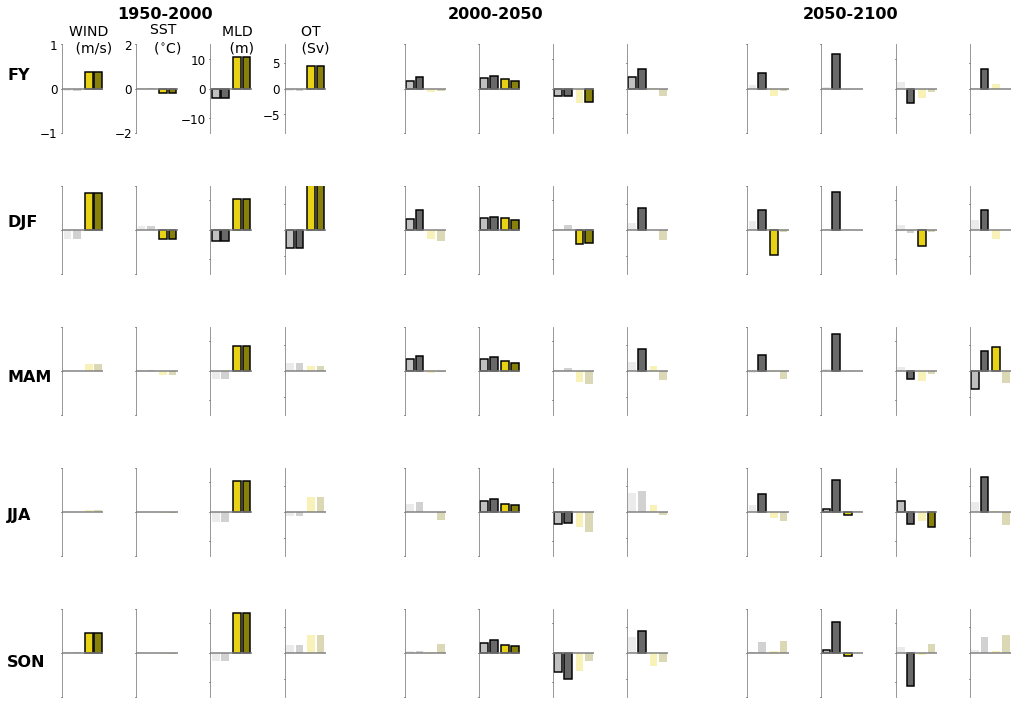

In [17]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(17, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND \n (m/s)','SST \n ($^{\circ}$C)','MLD \n (m)','OT \n (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(15): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
        if i > 0:
            inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1)
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fs = 16
fig.text(y = 0.91, x = 0.17, s = '1950-2000', fontsize = fs, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.27, s = '2000-2050', fontsize = fs, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = fs, fontweight = 'bold')
tle = 0.08
fig.text(x = tle, y = 0.84, s ='FY', fontsize = fs, fontweight = 'bold')
fig.text(x = tle, y = 0.67, s ='DJF', fontsize = fs, fontweight = 'bold')
fig.text(x = tle, y = 0.49, s ='MAM', fontsize = fs, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = fs, fontweight = 'bold')
fig.text(x = tle, y = 0.16, s ='SON', fontsize = fs, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('./figs/50yrtrends-ssp1-ssp3.jpg')
#fig.savefig('./figs/50yrtrends-ssp1-only.jpg')

### figure for paper

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


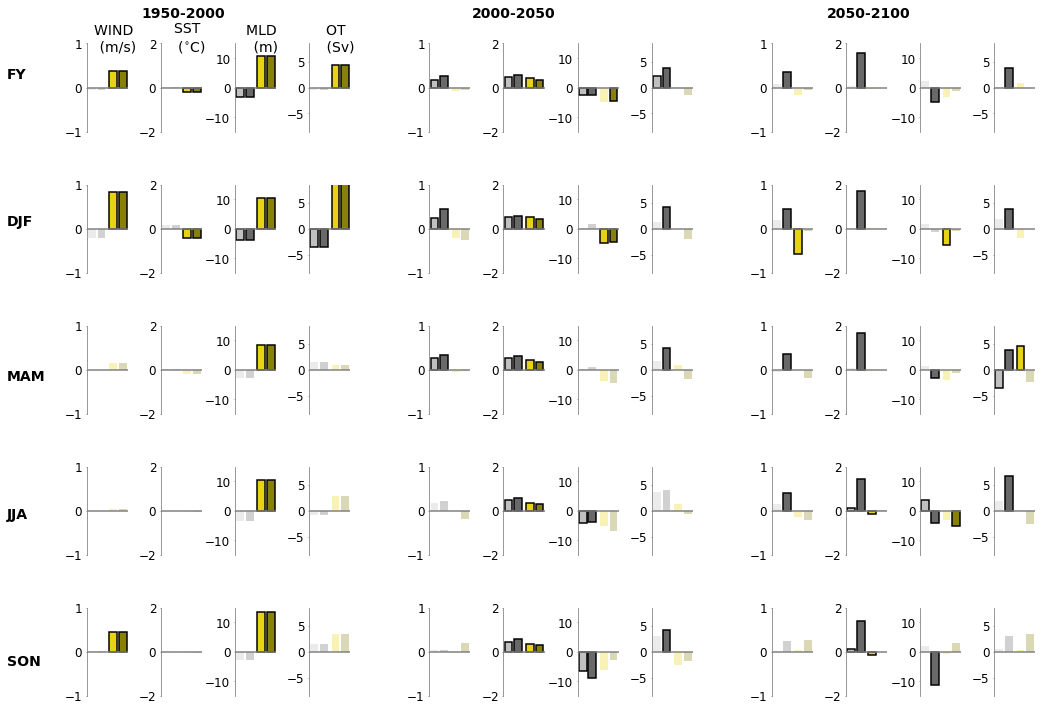

In [18]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(17, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND \n (m/s)','SST \n ($^{\circ}$C)','MLD \n (m)','OT \n (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(15): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fig.text(y = 0.91, x = 0.17, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
fig.text(x = tle, y = 0.84, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.67, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.49, s ='MAM', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()
plt.show()

### figure for paper - MF-trends

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


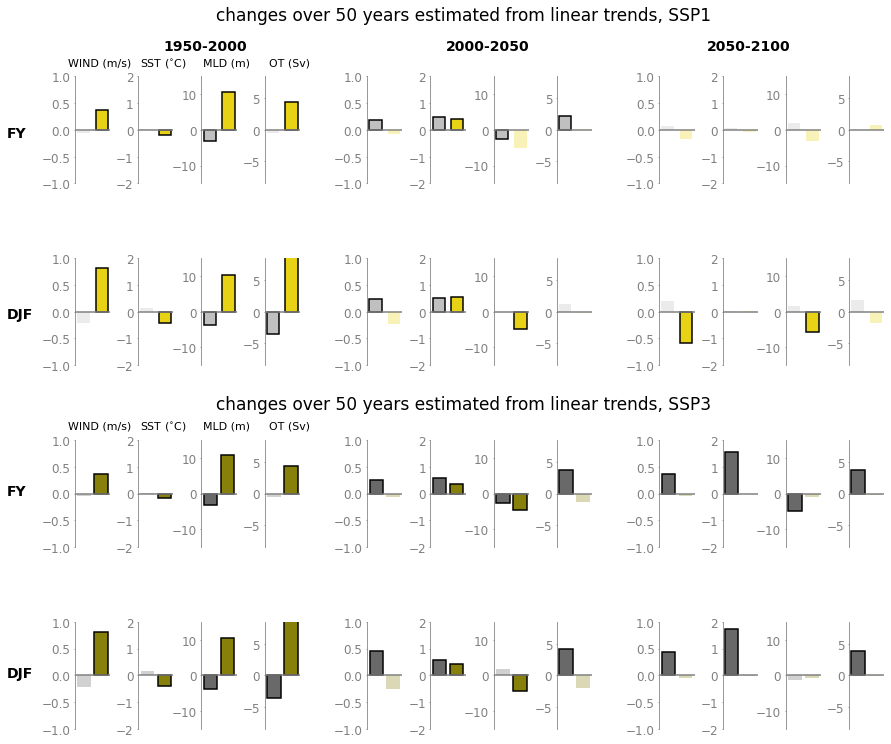

In [19]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14.5, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(4, 3, fig, wspace=0.3, hspace = 0.7)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(6): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        #tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        #tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')

### for the second half ############################################
for i in range(6): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i+6])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i+6], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        tplac = 1
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        #tplac = tplac+tw + biggap
#         inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
#                      alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
        
#         if i == 0:
#             inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
#         if i > 0:
    
    
    
fig.text(y = 0.91, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
fig.text(x = tle, y = 0.81, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.60, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.395, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.185, s ='DJF', fontsize = 14, fontweight = 'bold')
#fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.495, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP3',\
         fontsize = 17, color = 'k', fontweight = 'normal')
fig.text(y = 0.945, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP1',\
         fontsize = 17, color = 'k', fontweight = 'normal')
#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}
plt.show()
fig.savefig('./figs/paper/MF-50yrtrends.jpg', metadata = metadata)
#plt.savefig('./figs/MF-50yrtrends.png', metadata = metadata)

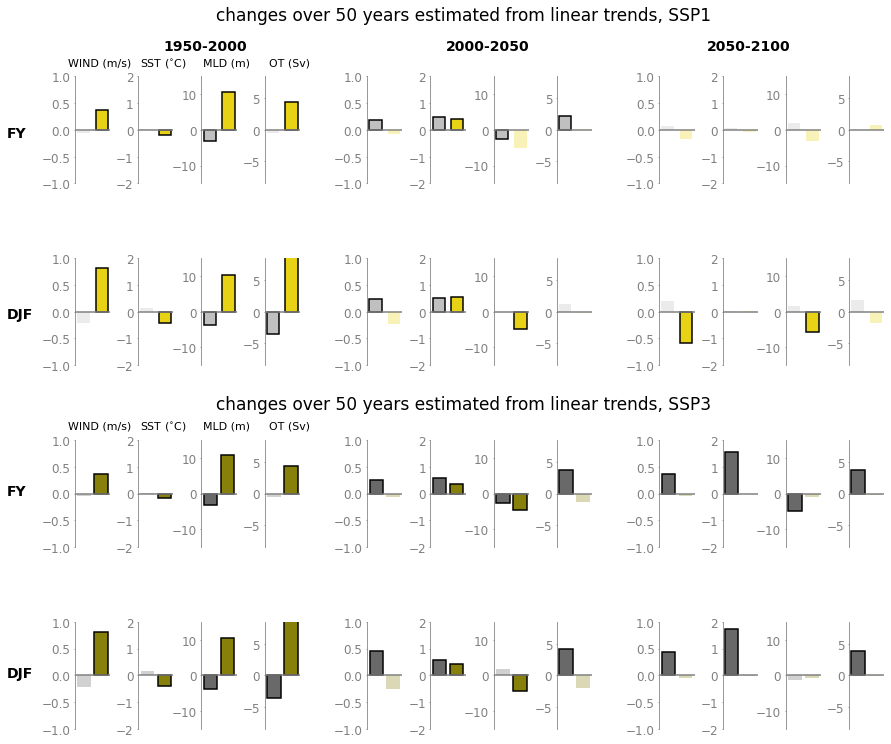

In [20]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14.5, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(4, 3, fig, wspace=0.3, hspace = 0.7)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(6): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        #tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        #tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')

### for the second half ############################################
for i in range(6): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i+6])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i+6], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        tplac = 1
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        #tplac = tplac+tw + biggap
#         inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
#                      alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
        
#         if i == 0:
#             inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
#         if i > 0:
    
    
    
fig.text(y = 0.91, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
fig.text(x = tle, y = 0.81, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.60, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.395, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.185, s ='DJF', fontsize = 14, fontweight = 'bold')
#fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.495, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP3',\
         fontsize = 17, color = 'k', fontweight = 'normal')
fig.text(y = 0.945, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP1',\
         fontsize = 17, color = 'k', fontweight = 'normal')
#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}
plt.show()
fig.savefig('./figs/paper/MF-50yrtrends.jpg', metadata = metadata)
#plt.savefig('./figs/MF-50yrtrends.png', metadata = metadata)

## 2 row version

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


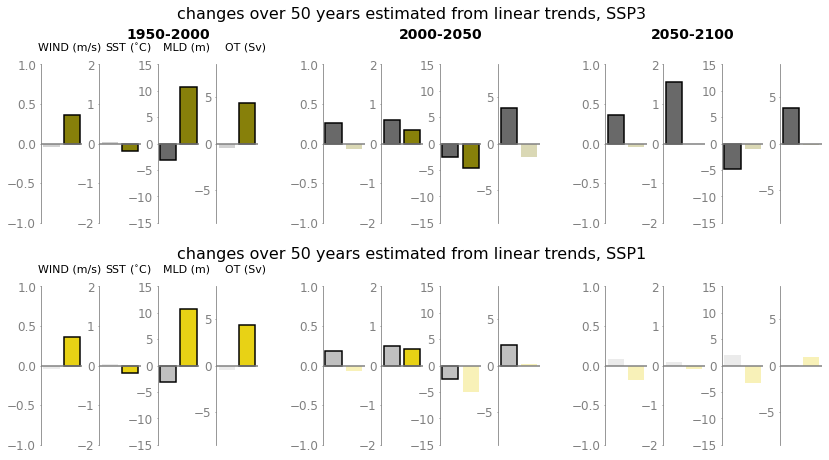

In [21]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14, 7))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(2, 3, fig, wspace=0.3, hspace = 0.4)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(3): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot


#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.4)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        tplac = 1
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        #tplac = tplac+tw + biggap
#         inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
#                      alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
        
#         if i == 0:
#             inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
#         if i > 0:
    
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i+3], wspace=0.4)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        #tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        #tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')

### for the second half ############################################
# for i in range(3): #15
    
#     per = i%3
#     tperiod = periodar[per]
#     tseas = seasonar[i]
#     if verbose:
#         print('')
#         print(f'{tperiod}, {tseas}')
    
#     # Create a subplot in the outer grid
#     outer_ax = plt.Subplot(fig, outer_grid[i+3])
#     fig.add_subplot(outer_ax)
#     outer_ax.set_yticks([])
#     outer_ax.set_xticks([])
#     outer_ax.spines['right'].set_visible(False)
#     outer_ax.spines['bottom'].set_visible(False)
#     outer_ax.spines['top'].set_visible(False)
#     outer_ax.spines['left'].set_visible(False)
    
    
    
fig.text(y = 0.93, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.93, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.93, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
# fig.text(x = tle, y = 0.81, s ='FY', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.60, s ='DJF', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.395, s ='FY', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.185, s ='DJF', fontsize = 14, fontweight = 'bold')
#fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.495, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP1',\
         fontsize = 16, color = 'k', fontweight = 'normal')
fig.text(y = 0.97, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP3',\
         fontsize = 16, color = 'k', fontweight = 'normal')
#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}
plt.show()
#fig.savefig('./figs/paper/MF-50yrtrends.jpg', metadata = metadata)
#plt.savefig('./figs/MF-50yrtrends.png', metadata = metadata)

## for egu talk

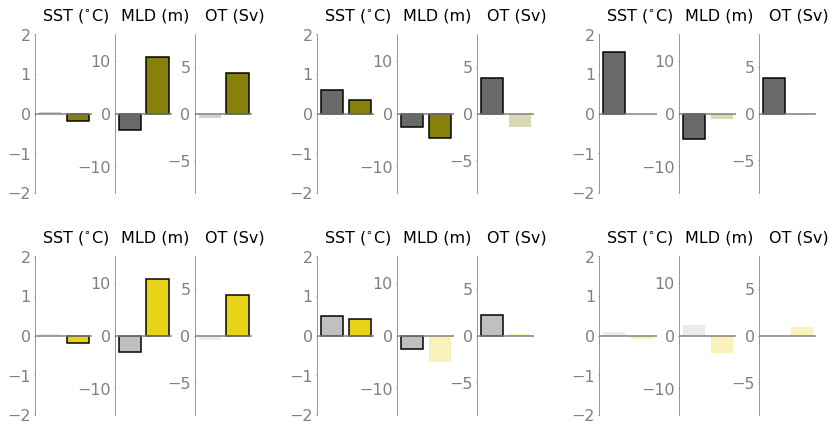

In [32]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14, 7))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(2, 3, fig, wspace=0.3, hspace = 0.4)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['sst','mld','ot']
quantityart = ['SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

quantmins = [-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(3): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot


#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer_grid[i], wspace=0.4)

    
    for j in range(3):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        tplac = 1
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        #tplac = tplac+tw + biggap
#         inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
#                      alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
#         if i == 0:
        inner_ax.set_title(tquantityt, fontsize = 16, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 16, length = 1, color = 'grey')
        
#         if i == 0:
#             inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
#         if i > 0:
    
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer_grid[i+3], wspace=0.4)

    
    for j in range(3):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        #tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        #tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
#         if i == 0:
        inner_ax.set_title(tquantityt, fontsize = 16, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 16, length = 1, color = 'grey')


    
    
# fig.text(y = 0.93, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
# fig.text(y = 0.93, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
# fig.text(y = 0.93, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
# fig.text(x = tle, y = 0.81, s ='FY', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.60, s ='DJF', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.395, s ='FY', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.185, s ='DJF', fontsize = 14, fontweight = 'bold')
#fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')
# fig.text(y = 0.495, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP1',\
#          fontsize = 16, color = 'k', fontweight = 'normal')
# fig.text(y = 0.97, x = 0.26, s = 'changes over 50 years estimated from linear trends, SSP3',\
#          fontsize = 16, color = 'k', fontweight = 'normal')
#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}

plt.show()
#fig.savefig('./figs/paper/MF-50yrtrends.jpg', metadata = metadata)
#plt.savefig('./figs/MF-50yrtrends.png', metadata = metadata)

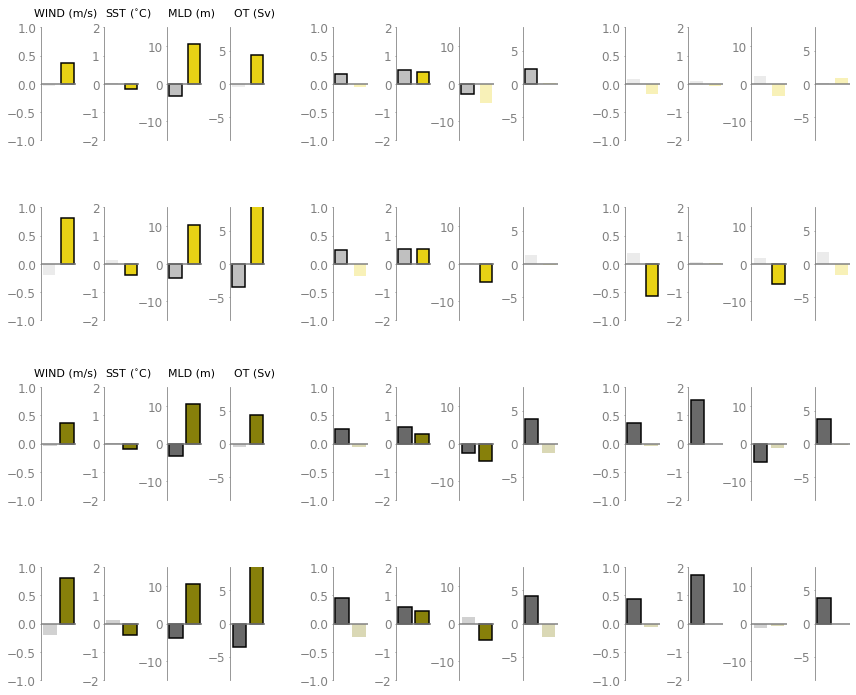

In [23]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14.5, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(4, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.4*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.4*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(6): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        #tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        #tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')

### for the second half ############################################
for i in range(6): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i+6])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i+6], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
#         inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
#                      alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
        tplac = tplac + tw + smolgap
        tplac = 1
        inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        #tplac = tplac+tw + biggap
#         inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
#                      alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
        tplac = tplac+tw + smolgap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
        
#         if i == 0:
#             inner_ax.set_title(tquantityt, fontsize = 14, fontweight = 'normal', y = 0.85, x = 0.7)
#         if i > 0:
    
    

for i in range(12):
    outer_ax = plt.Subplot(fig, outer_grid[i])
    if i < 6:  # For the first two rows, position normally
        
        outer_ax.set_position([0.1 + j*0.5, 0.5 - i*0.25, 0.4, 0.2])
    else:  # For the last two rows, shift downwards to create space
        outer_ax.set_position([0.1 + j*0.5, 0.5 - i*0.25 - 0.1, 0.4, 0.2])     
    
    
    
# fig.text(y = 0.91, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
# fig.text(y = 0.91, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
# fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
# tle = 0.06
# fig.text(x = tle, y = 0.81, s ='FY', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.60, s ='DJF', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.395, s ='FY', fontsize = 14, fontweight = 'bold')
# fig.text(x = tle, y = 0.185, s ='DJF', fontsize = 14, fontweight = 'bold')
# #fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')
# fig.text(y = 0.51, x = 0.20, s = '____________________________________________________________________________',\
#          fontsize = 16, color = 'grey', fontweight = 'bold')

# #fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# # Adjust layout
# plt.tight_layout()

metadata = {
    'Description': 'scratch/SOZONE/windAnalyis/oceanFields/bargraph-with-50yrtrends.ipynb'
}
plt.show()
#fig.savefig('./figs/paper/MF-50yrtrends.jpg', metadata = metadata)




In [24]:
from PIL import Image

# Open the image file
with Image.open('./figs/MF-50yrtrends.jpg') as img:
    # Extract metadata
    metadata = img.info
    
    # Print metadata
    print(metadata)

{'jfif': 257, 'jfif_version': (1, 1), 'dpi': (72, 72), 'jfif_unit': 1, 'jfif_density': (72, 72)}


### ssp 1 only

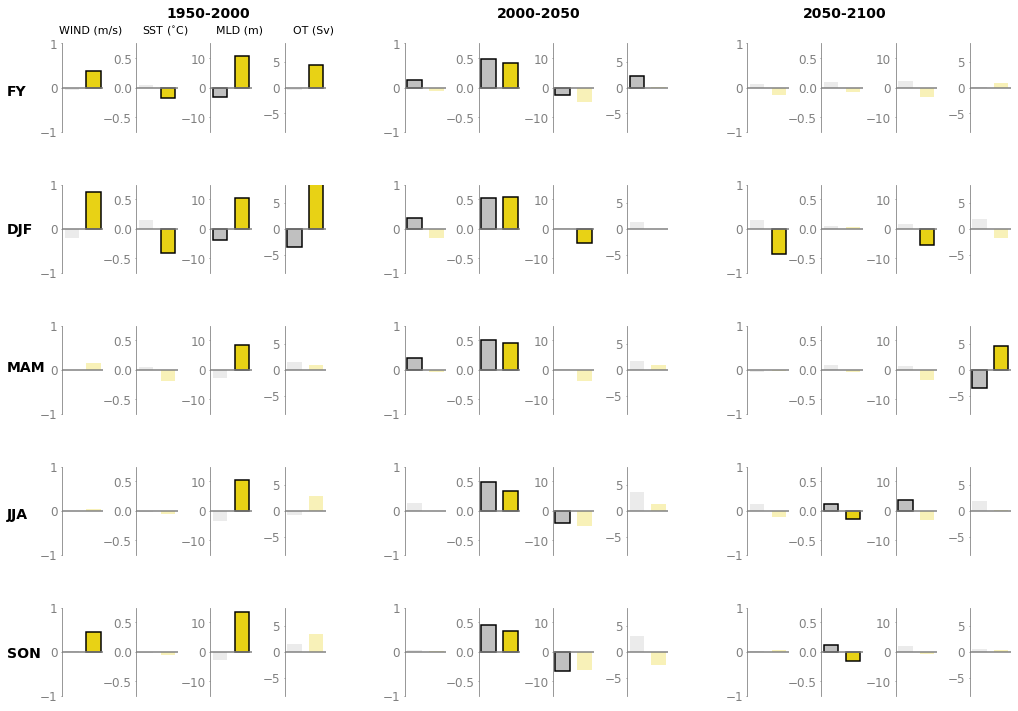

In [25]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(17, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.15*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.15*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(15): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw, \
                     alpha = ghgssp1alpha, edgecolor = 'k', lw = ghgssp1ew)
        
#         tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp1, color = ozssp1col, width = tw,\
                     alpha = ozonessp1alpha, edgecolor = 'k', lw = ozonessp1ew)
        
#         tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fig.text(y = 0.91, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.08
fig.text(x = tle, y = 0.82, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.66, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.50, s ='MAM', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.17, s ='SON', fontsize = 14, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('./figs/paper/SF-50yrtrends-SSP1.jpg', metadata = metadata)

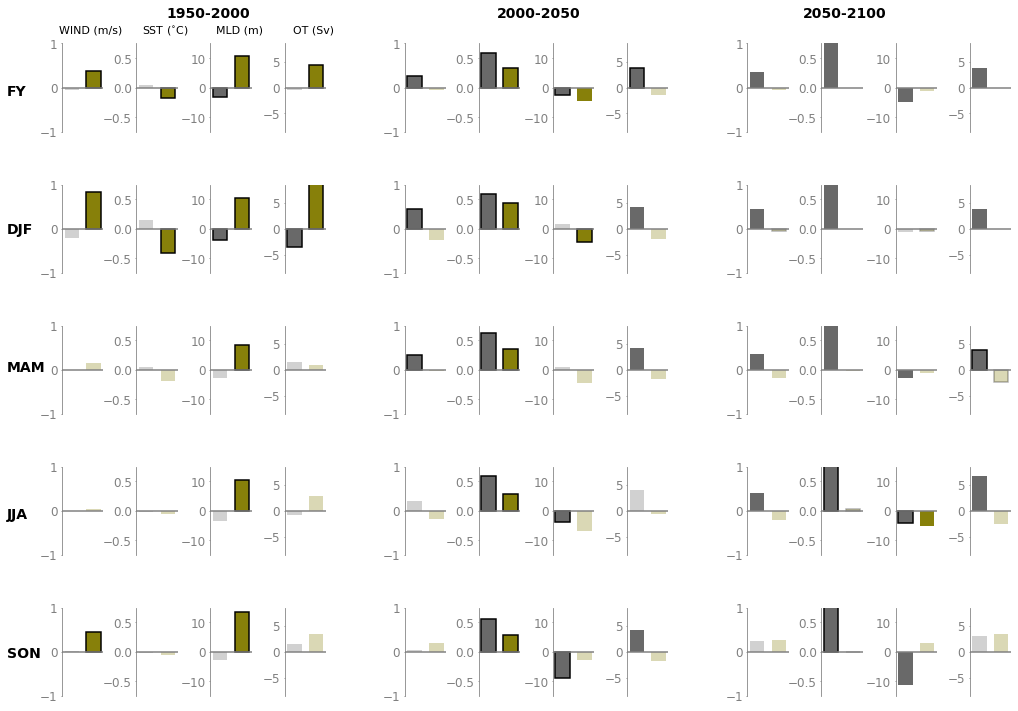

In [26]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1.2; marg = 0.2; biggap = 0.6; smolgap = 0.3
warmssp1col = 'silver'# 'lightskyblue' #'lightgrey''dimgrey', 'silver' 
warmssp3col = 'dimgrey' #'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(17, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantityart = ['WIND (m/s)','SST ($^{\circ}$C)','MLD (m)','OT (Sv)']
quantmins = [-0.2*5 ,-0.15*5 ,-3*5 ,-1.7*5 ]

quantmaxs = [0.2*5 ,0.15*5,3*5 ,1.7*5 ]

# Loop to create each of the 4 main subplots
for i in range(15): #15
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        tquantityt = quantityart[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values *5 
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ghgsigssp1 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values*5 
        ozonesigssp1 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values*5 
        ghgsigssp3 = ds.sig.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values*5 
        ozonesigssp3 = ds.sig.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values*5 
        
        ew = 1.5
        ghgssp1alpha = 1; ghgssp1ew = ew; ghgssp3alpha = 1; ghgssp3ew = ew;
        ozonessp1alpha = 1; ozonessp1ew = ew; ozonessp3alpha = 1; ozonessp3ew = ew;
        
        nsalpha = 0.3; nsedgewidth = 0
        if ghgsigssp1 == 0: ghgssp1alpha = nsalpha; ghgssp1ew = nsedgewidth
        if ghgsigssp3 == 0: ghgssp3alpha = nsalpha; ghgssp3ew = nsedgewidth
        if ozonesigssp1 == 0: ozonessp1alpha = nsalpha; ozonessp1ew = nsedgewidth
        if ozonesigssp3 == 0: ozonessp3alpha = nsalpha; ozonessp3ew = nsedgewidth
        
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp1, {ghgvalssp1} ({ghgsigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp1, {ozonevalssp1} ({ozonesigssp1})')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg ssp3, {ghgvalssp3} ({ghgsigssp3})')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone ssp3, {ozonevalssp3} ({ozonesigssp3})')
        
        tplac = 1
        inner_ax.bar(1,ghgvalssp3, color = warmssp3col, width = tw, \
                     alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp1ew)
        
#         tplac = tplac + tw + smolgap
#         inner_ax.bar(tplac,ghgvalssp3, color = warmssp3col, width = tw,\
#                      alpha = ghgssp3alpha, edgecolor = 'k', lw = ghgssp3ew)
        
        tplac = tplac+tw + biggap
        inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
                     alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp1ew)
        
#         tplac = tplac+tw + smolgap
#         inner_ax.bar(tplac,ozonevalssp3, color = ozssp3col, width = tw,\
#                      alpha = ozonessp3alpha, edgecolor = 'k', lw = ozonessp3ew)
                     
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,tplac+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['bottom'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        inner_ax.spines['left'].set_color('grey')
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.tick_params(axis='y', colors='grey')
        if i == 0:
            inner_ax.set_title(tquantityt, fontsize = 11, fontweight = 'normal', y = 1.05, x = 0.7)
#         if i > 0:
#             inner_ax.set_yticklabels([])
        inner_ax.tick_params(labelsize = 12, length = 1, color = 'grey')
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fig.text(y = 0.91, x = 0.21, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.21+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.08
fig.text(x = tle, y = 0.82, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.66, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.50, s ='MAM', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.17, s ='SON', fontsize = 14, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('./figs/paper/SF-50yrtrends-SSP3.jpg', metadata = metadata)

## ssp 3